In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(29, 17)

In [6]:
df_states.shape

(1485, 17)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-28,56,118234,617470,735704,65712,16729.0,1965,801416,a54933aec2de2cb0f418ffbc85c6c58d7481be77,2020-03-28T20:00:00Z,735704,435.0,3011.0,90250.0,18821.0,109071.0
3,2020-03-29,56,139061,692290,831351,65549,19730.0,2428,896900,0bcb1178e16a889408a98222caae4bd49fe3d9b8,2020-03-29T20:00:00Z,831351,463.0,3001.0,74820.0,20827.0,95647.0
2,2020-03-30,56,160530,784324,944854,65382,22303.0,2939,1010236,5d6b80da84d18b345f21f914f55a72520c680310,2020-03-30T20:00:00Z,944854,511.0,2573.0,92034.0,21469.0,113503.0
1,2020-03-31,56,184770,864201,1048971,59529,26660.0,3746,1108500,6e89ec462c3604565275d355a0dae3e8ddb484c5,2020-03-31T20:00:00Z,1048971,807.0,4357.0,79877.0,24240.0,104117.0
0,2020-04-01,56,210770,939190,1149960,59687,31142.0,4700,1209647,7bc80be03882b9c9726ceb96fb7421ab320a720c,2020-04-01T20:00:00Z,1149960,954.0,4482.0,74989.0,26000.0,100989.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-04-01,NE,210.0,3475.0,8.0,NaN,4.0,3693,25612ca595861773436de50a88c55bcf58962ac8,2020-04-01T20:00:00Z,3685,31,1.0,0.0,544.0,38.0,582.0
31,2020-04-01,ND,142.0,4351.0,NaN,23.0,3.0,4493,34c95ce5c808653e823263325d09ab6f6e9a0e56,2020-04-01T20:00:00Z,4493,38,0.0,2.0,220.0,16.0,236.0
30,2020-04-01,NC,1584.0,24659.0,NaN,204.0,10.0,26243,25ee8214b58109bd818071301eeeee63b46a3ece,2020-04-01T20:00:00Z,26243,37,2.0,47.0,3051.0,86.0,3137.0
28,2020-04-01,MS,1073.0,3712.0,NaN,332.0,22.0,4785,35ae065ceaf922c76b0a8294fab988d65a256d16,2020-04-01T20:00:00Z,4785,28,2.0,121.0,175.0,136.0,311.0
0,2020-04-01,AK,133.0,4470.0,NaN,9.0,3.0,4603,8f5b266fd8dae5257f0202c567e5214c32a44482,2020-04-01T20:00:00Z,4603,2,0.0,2.0,876.0,14.0,890.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive per million
df_states['pos_rate'] = df_states['positive'] / (df_states['population'] / 1e6)

# Calculate hospitalized per million
df_states['hosp_rate'] = df_states['hospitalized'] / (df_states['population'] / 1e6)

# Calculate deaths per million
df_states['death_rate'] = df_states['death'] / (df_states['population'] / 1e6)

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate tests per million people
df_states['test_rate'] = df_states['total'] / (df_states['population'] / 1e6)

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,...,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate
1412,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,18fc4cee9e62382b649645f5fb862fd1598ad7c2,2020-03-11T20:00:00Z,...,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN
1413,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,ac695ca11cd43d13514370bf495bb3af78f1b66f,2020-03-10T20:00:00Z,...,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,0.0
1414,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,1306b115d298a86cb3e626a0d975e35767198712,2020-03-09T20:00:00Z,...,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN
1415,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,3c360a7f81ed305bc73fb5dfbc07aec951489c2f,2020-03-08T20:00:00Z,...,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN
1416,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,d311061ed771387fdb2db7b876bf2f72435f0de7,2020-03-07T21:00:00Z,...,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,fips,deathIncrease,hospitalizedIncrease,...,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_rate,hosp_rate,death_rate,positive_rate,test_rate
count,1417.000000,1312.000000,438.00000,343.000000,760.000000,1312.000000,1417.000000,1417.000000,1365.000000,1365.000000,...,1365.000000,1365.000000,1417.000000,1.417000e+03,1400.000000,1417.000000,343.000000,760.000000,1307.000000,1312.000000
mean,892.409315,4981.169970,1240.16895,462.784257,29.146053,5943.876524,5504.473536,29.505999,3.434432,22.849817,...,154.230037,841.130403,29.505999,6.545188e+06,429.865546,101.328121,43.962597,3.504232,0.125329,1035.158369
std,4722.602713,11809.305651,7951.77968,1831.244132,117.807355,16133.339201,15601.222542,16.289970,19.588572,166.308643,...,665.468836,2074.847847,16.289970,7.373713e+06,1601.984021,287.128945,97.864829,7.988847,0.144254,1601.921426
min,0.000000,0.000000,-3.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-296.000000,...,-38.000000,-585.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,94.000000,4.00000,19.000000,1.000000,127.000000,81.000000,16.000000,0.000000,0.000000,...,2.000000,13.000000,16.000000,1.805832e+06,54.955978,1.790349,9.120382,0.278876,0.043796,31.063786
50%,64.000000,710.500000,20.50000,73.000000,5.000000,829.000000,611.000000,29.000000,0.000000,0.000000,...,14.000000,103.000000,29.000000,4.468402e+06,109.860468,18.233209,21.235473,1.036663,0.083244,258.992156
75%,368.000000,4350.000000,100.00000,230.500000,16.000000,4615.000000,4143.000000,42.000000,1.000000,0.000000,...,73.000000,687.000000,42.000000,7.535591e+06,229.511156,99.913037,38.708596,3.184886,0.152293,1454.278597
max,83712.000000,137168.000000,64400.00000,18368.000000,1941.000000,220880.000000,220880.000000,72.000000,391.000000,3039.000000,...,9298.000000,23649.000000,72.000000,3.955704e+07,11490.119540,4283.650840,939.914213,99.323470,0.891705,11302.714038


## California

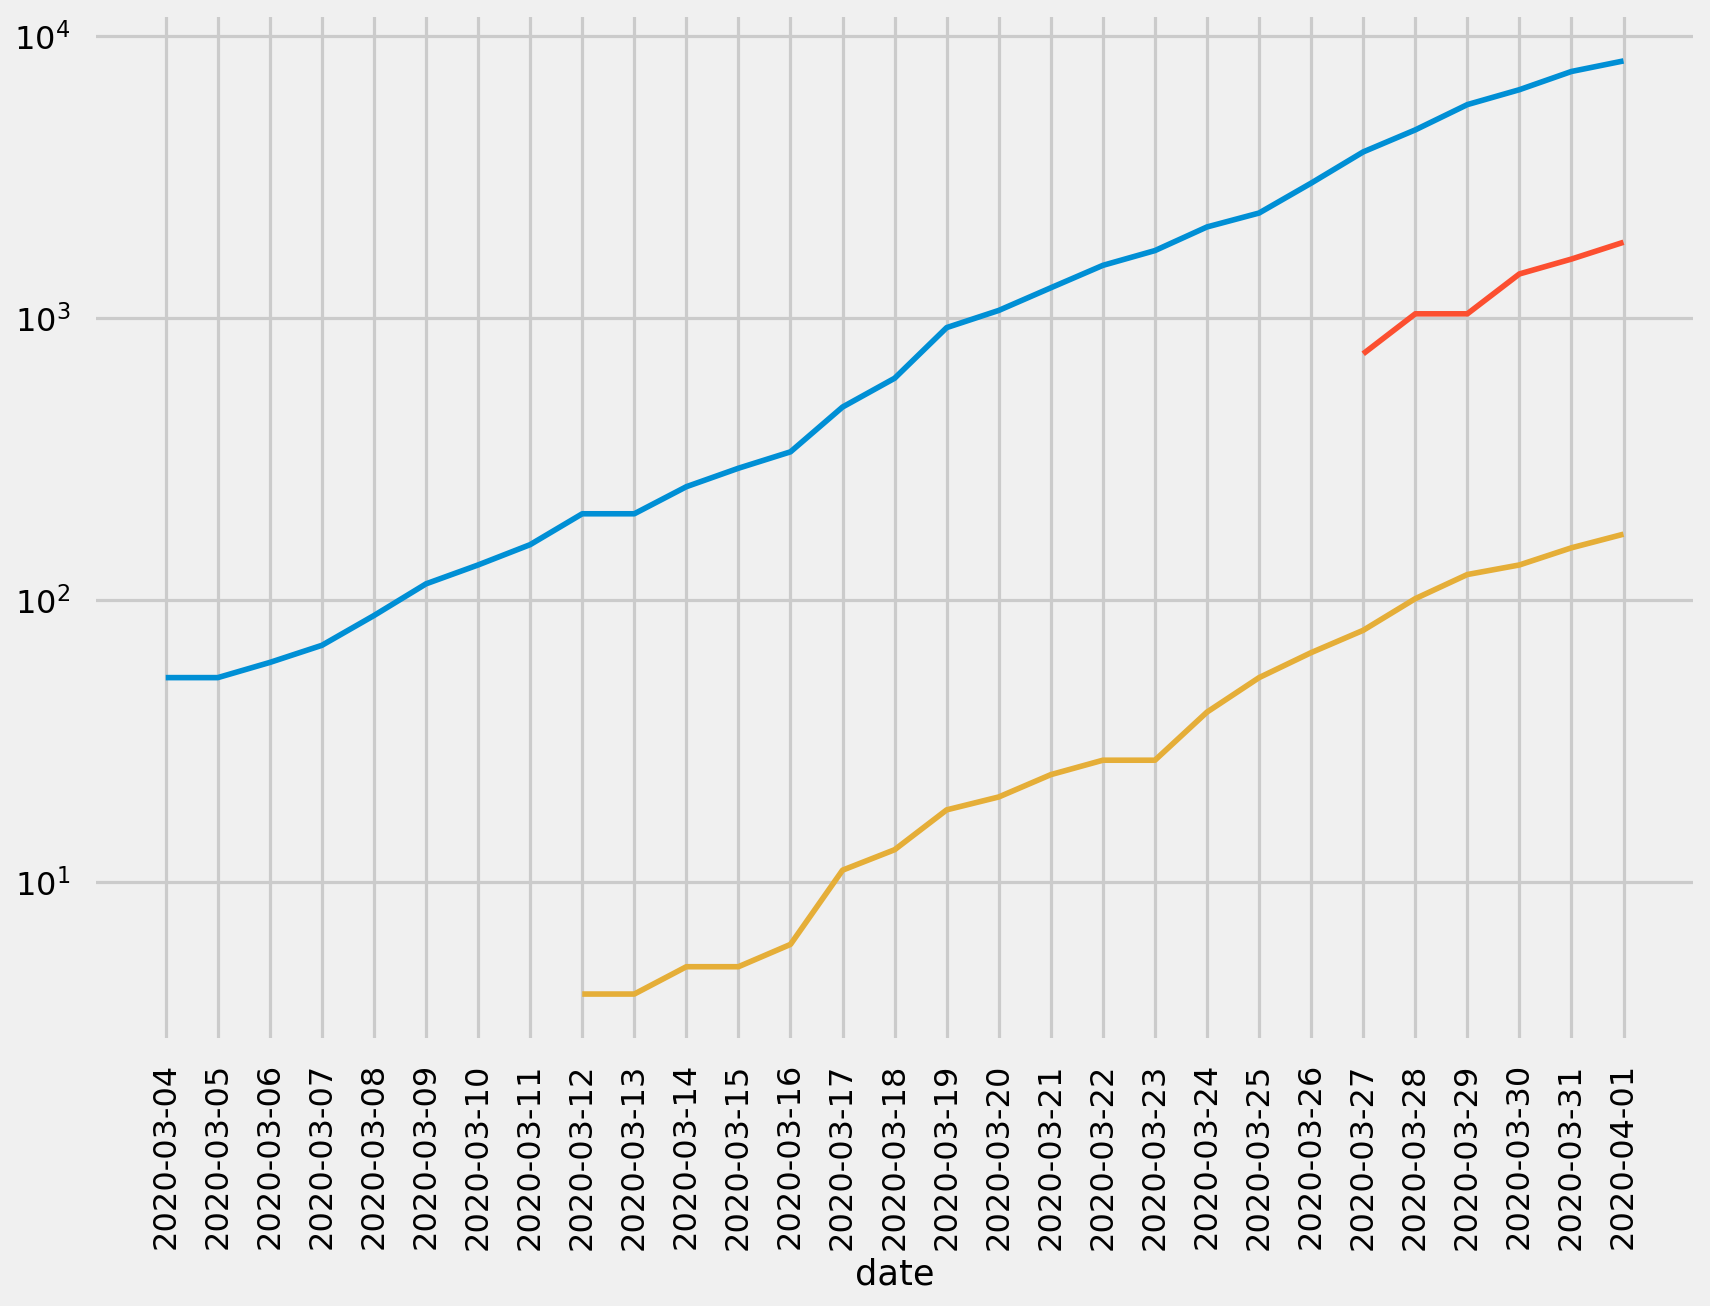

In [14]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="hospitalized", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

## New York

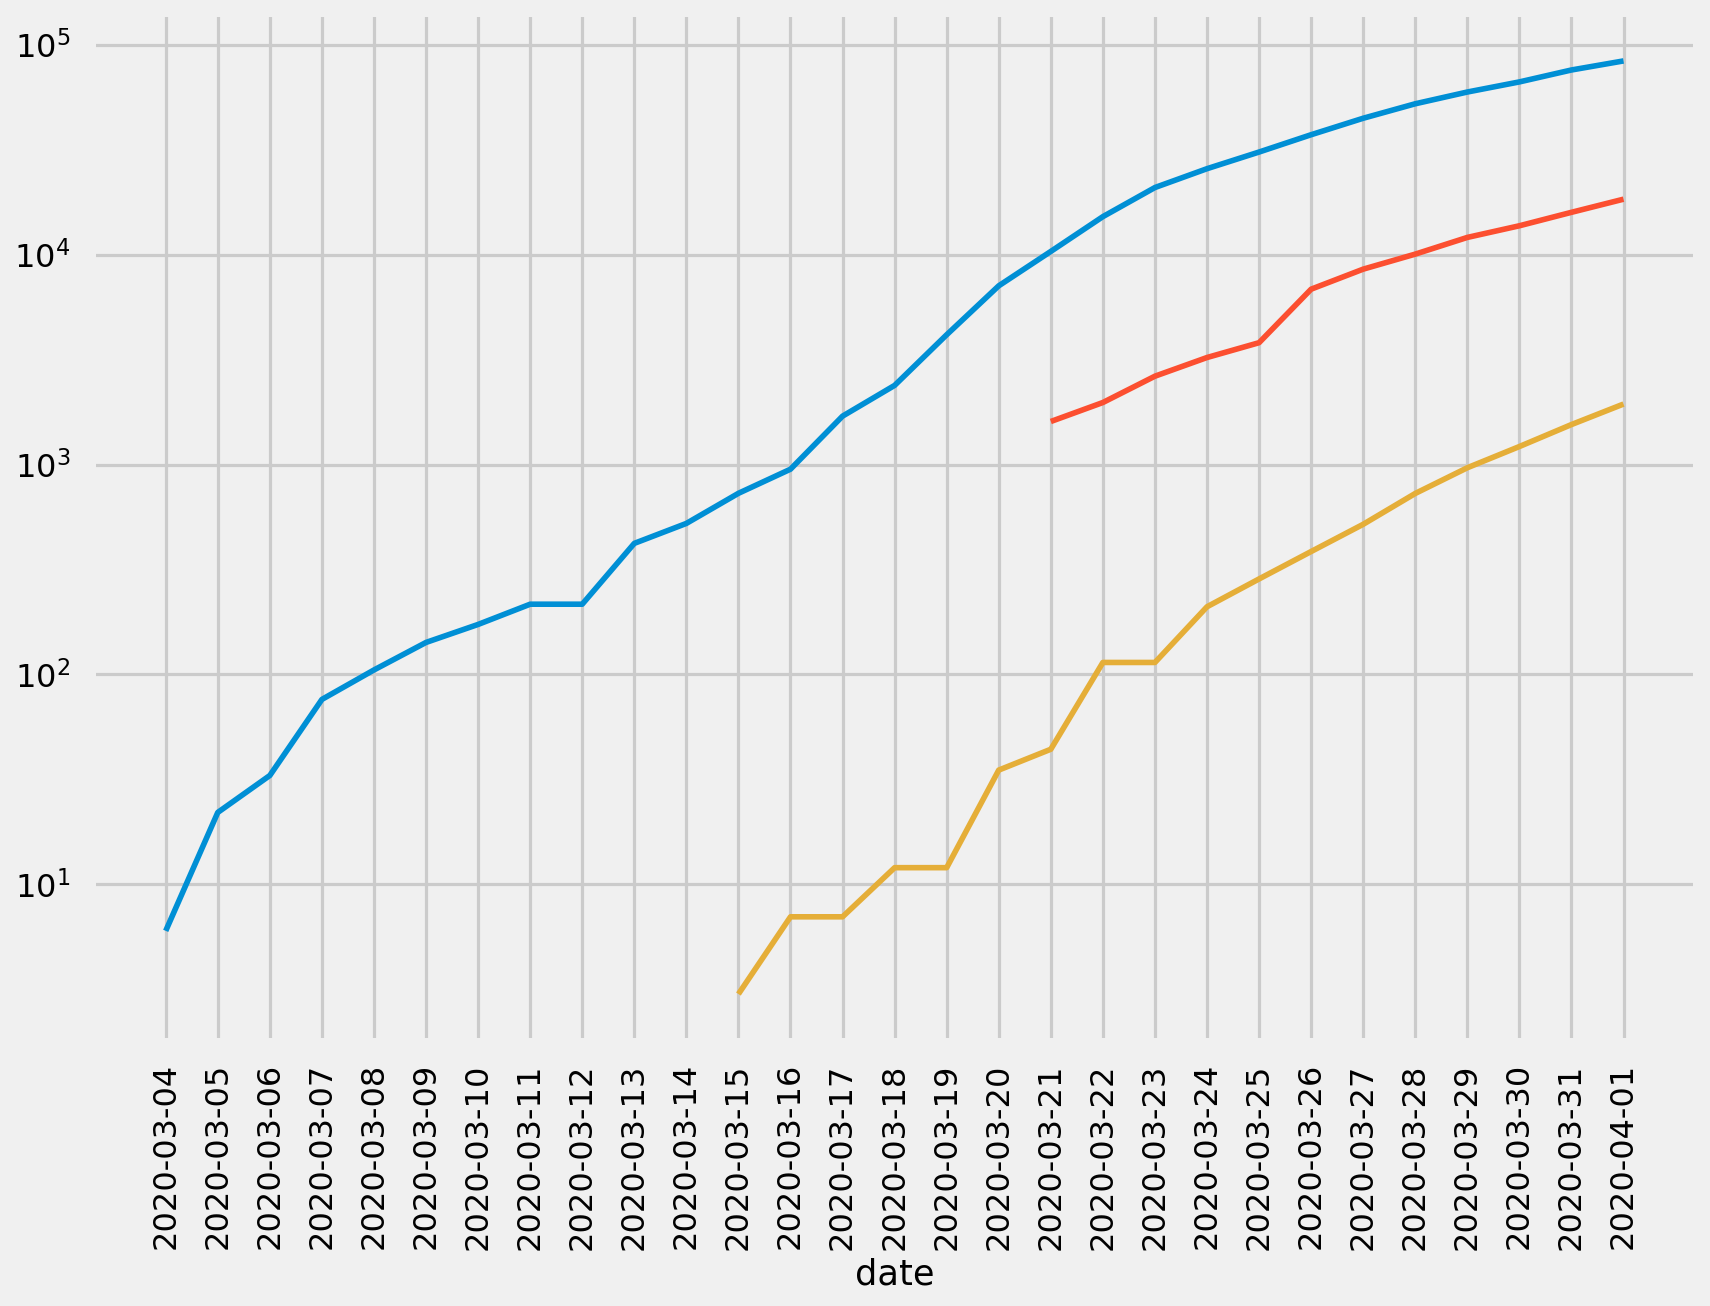

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="hospitalized", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="death", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_ylabel('')
ax.set_yscale('log')
plt.show()

# Top 10 States by Deaths

In [16]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'MI', 'LA', 'WA', 'CA', 'IL', 'GA', 'MA', 'FL']

In [17]:
df_states.query('date == @latest_date').sort_values(by='death', 
                                                    ascending=False)[['state', 'death']]

,state,death
931,NY,1941.0
848,NJ,355.0
603,MI,337.0
494,LA,273.0
1306,WA,224.0
109,CA,171.0
384,IL,141.0
276,GA,139.0
520,MA,122.0
247,FL,87.0


In [24]:
# Deaths per million people
df_states.query('date == @latest_date').sort_values(by='death_rate', 
                                                    ascending=False)[['state', 'death_rate']]

,state,death_rate
931,NY,99.323470
494,LA,58.583968
848,NJ,39.849492
603,MI,33.713772
1306,WA,29.725605
1279,VT,25.546903
166,CT,23.791763
520,MA,17.675654
192,DC,15.659366
276,GA,13.213587


# Deaths

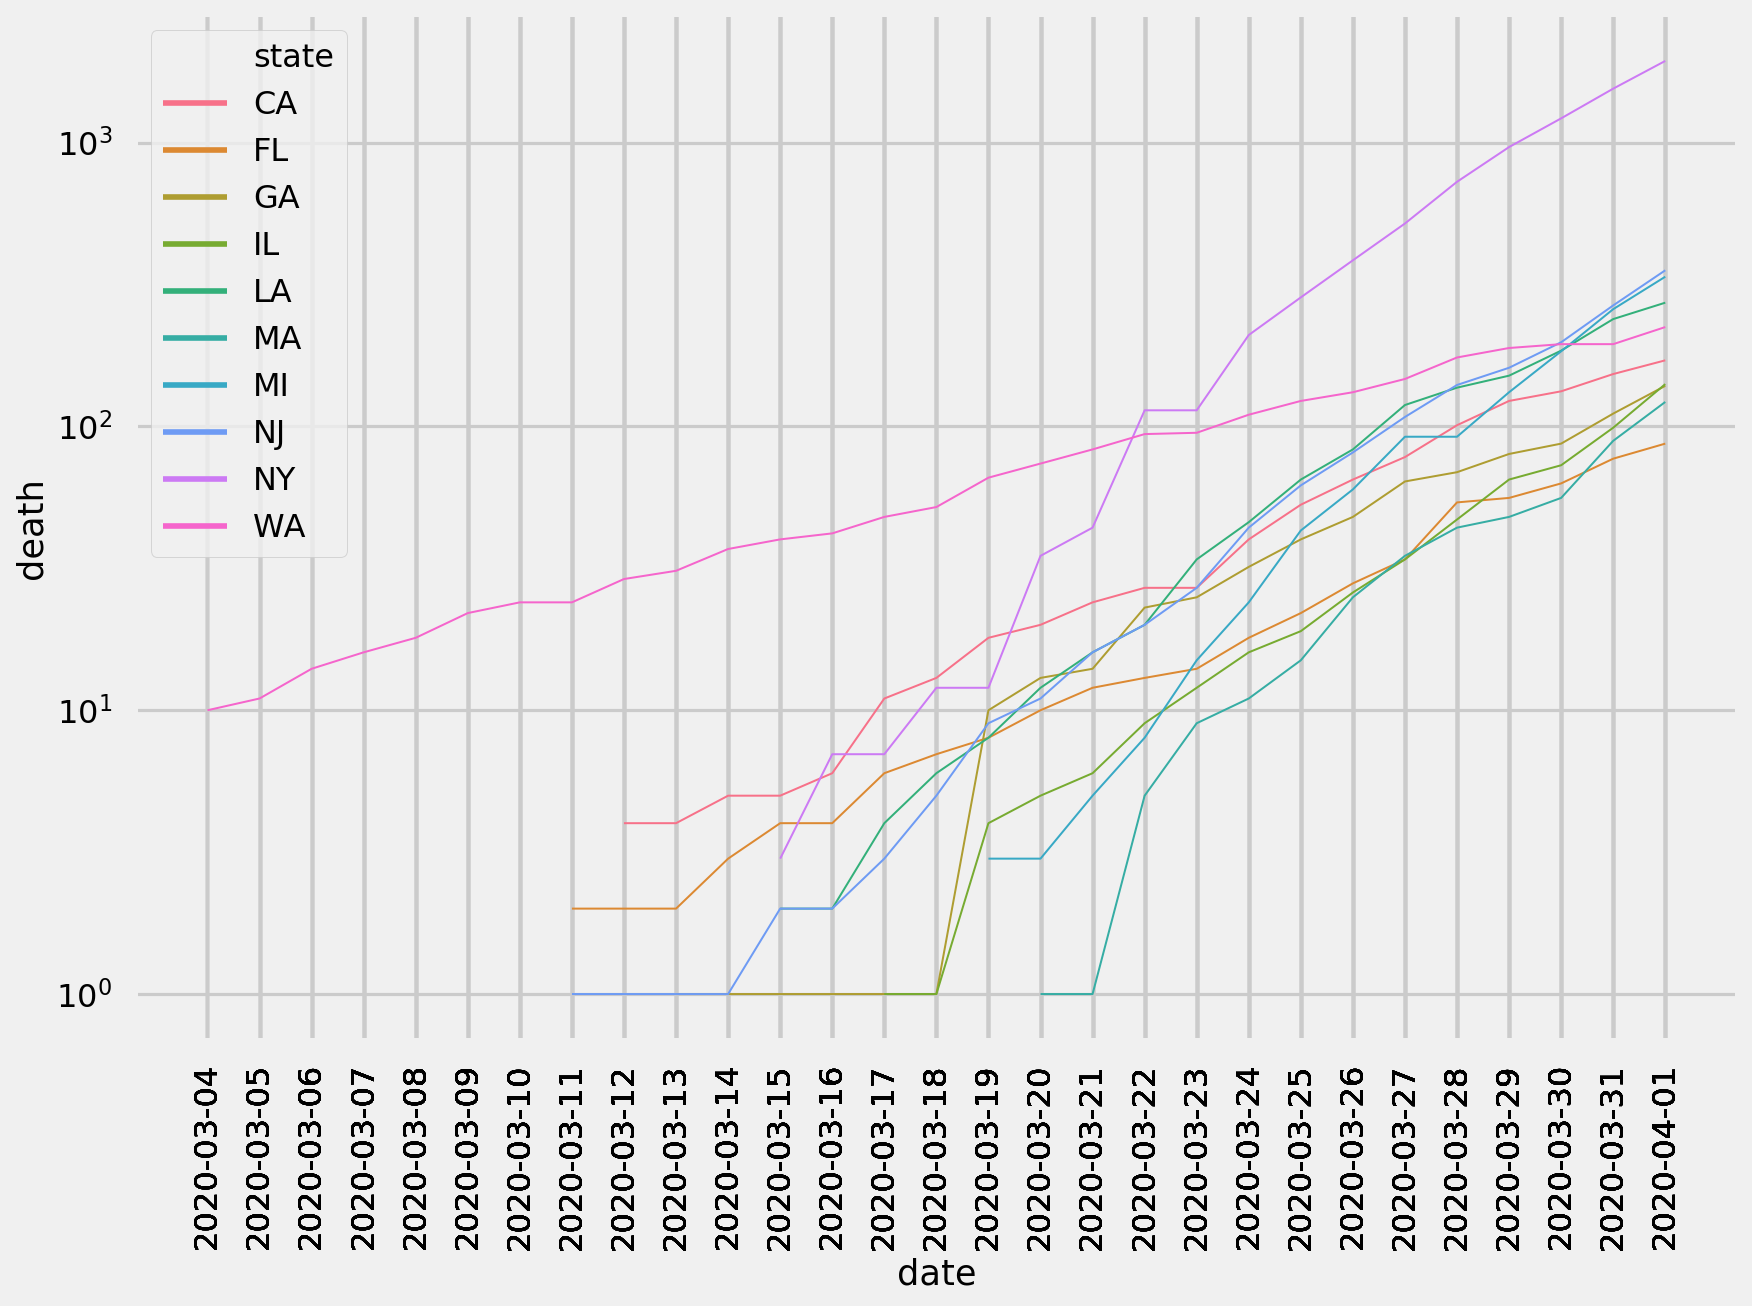

In [18]:
ax = sns.lineplot(x="date", 
                  y="death", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Positive Cases Per Million People

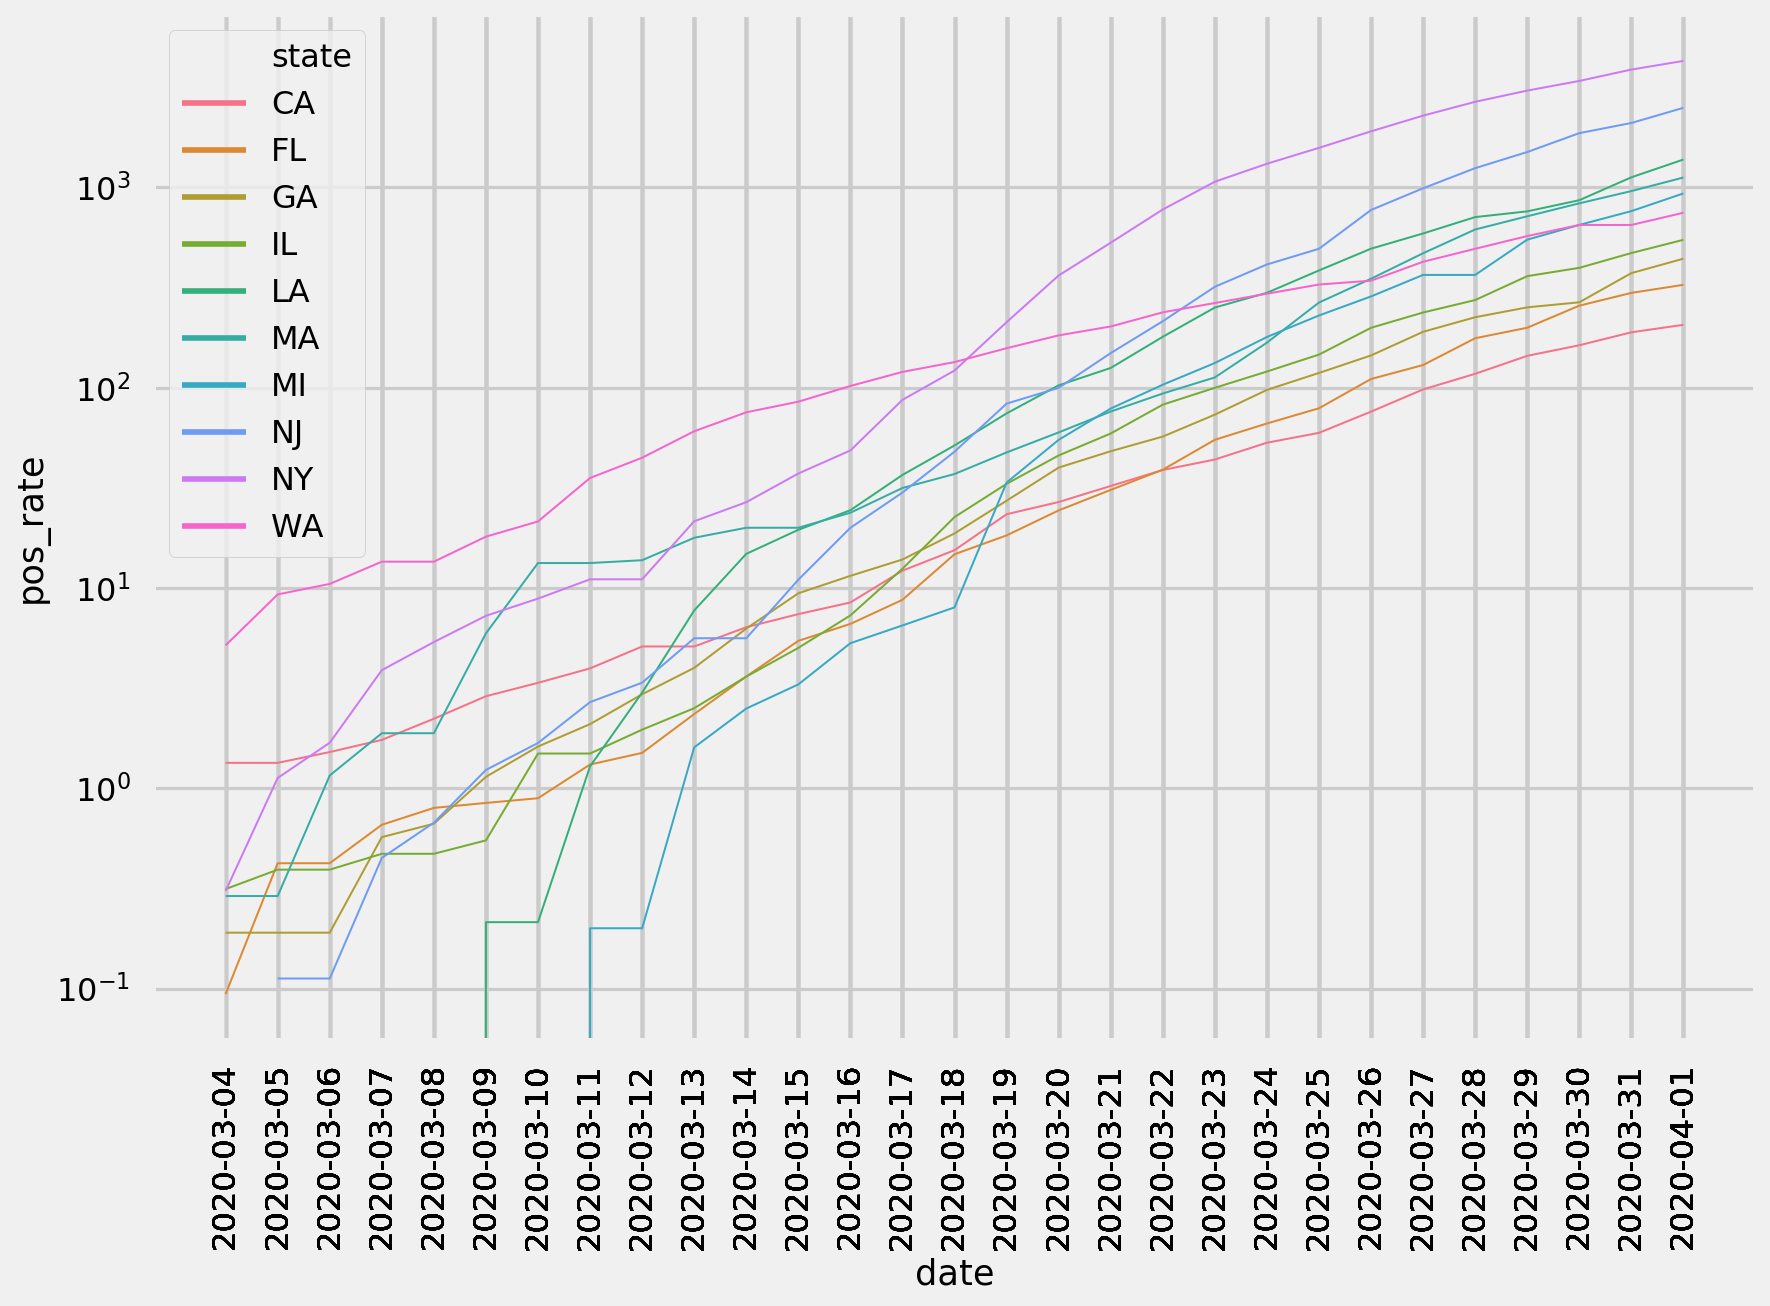

In [19]:
ax = sns.lineplot(x="date", y="pos_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Hospitalized Per Million People

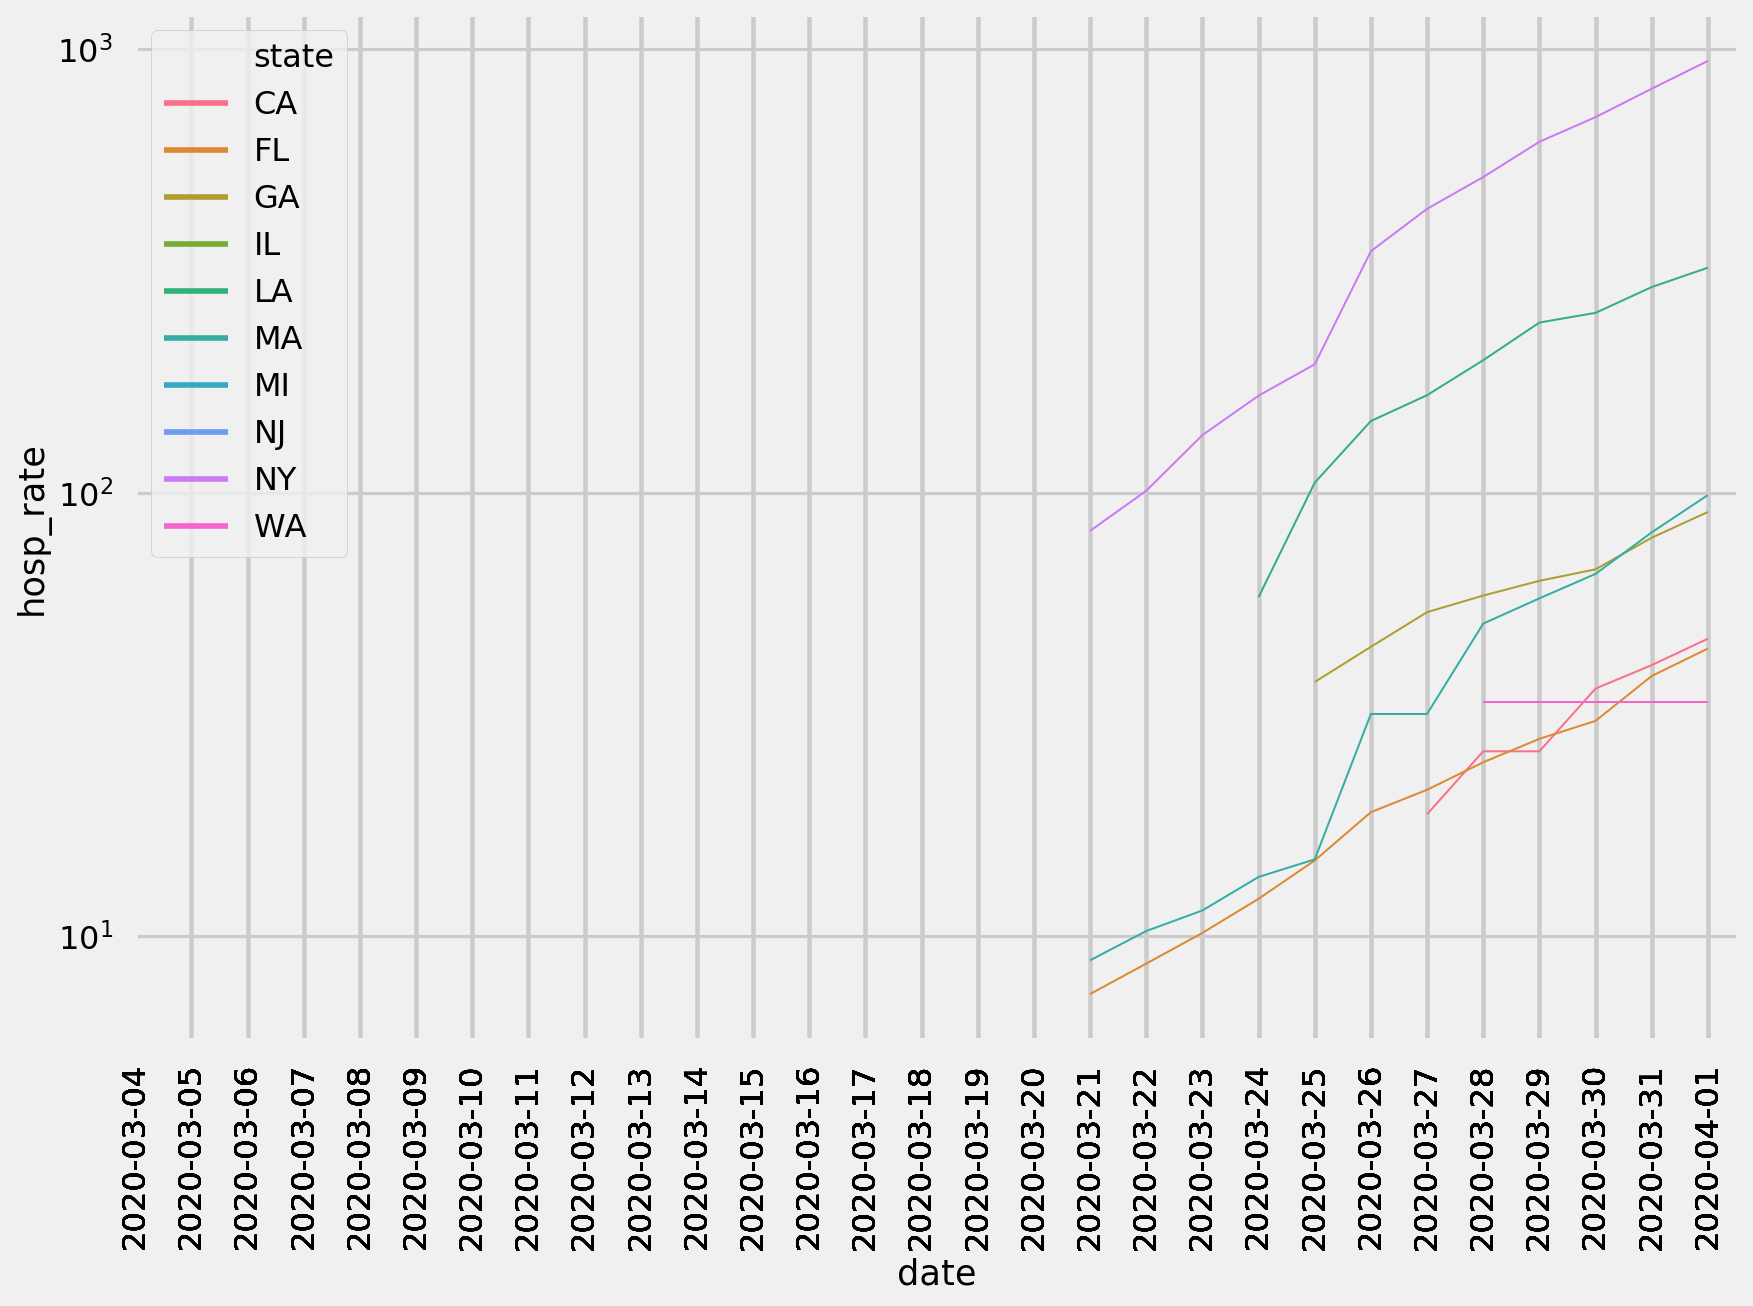

In [20]:
ax = sns.lineplot(x="date", y="hosp_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Deaths Per Million People

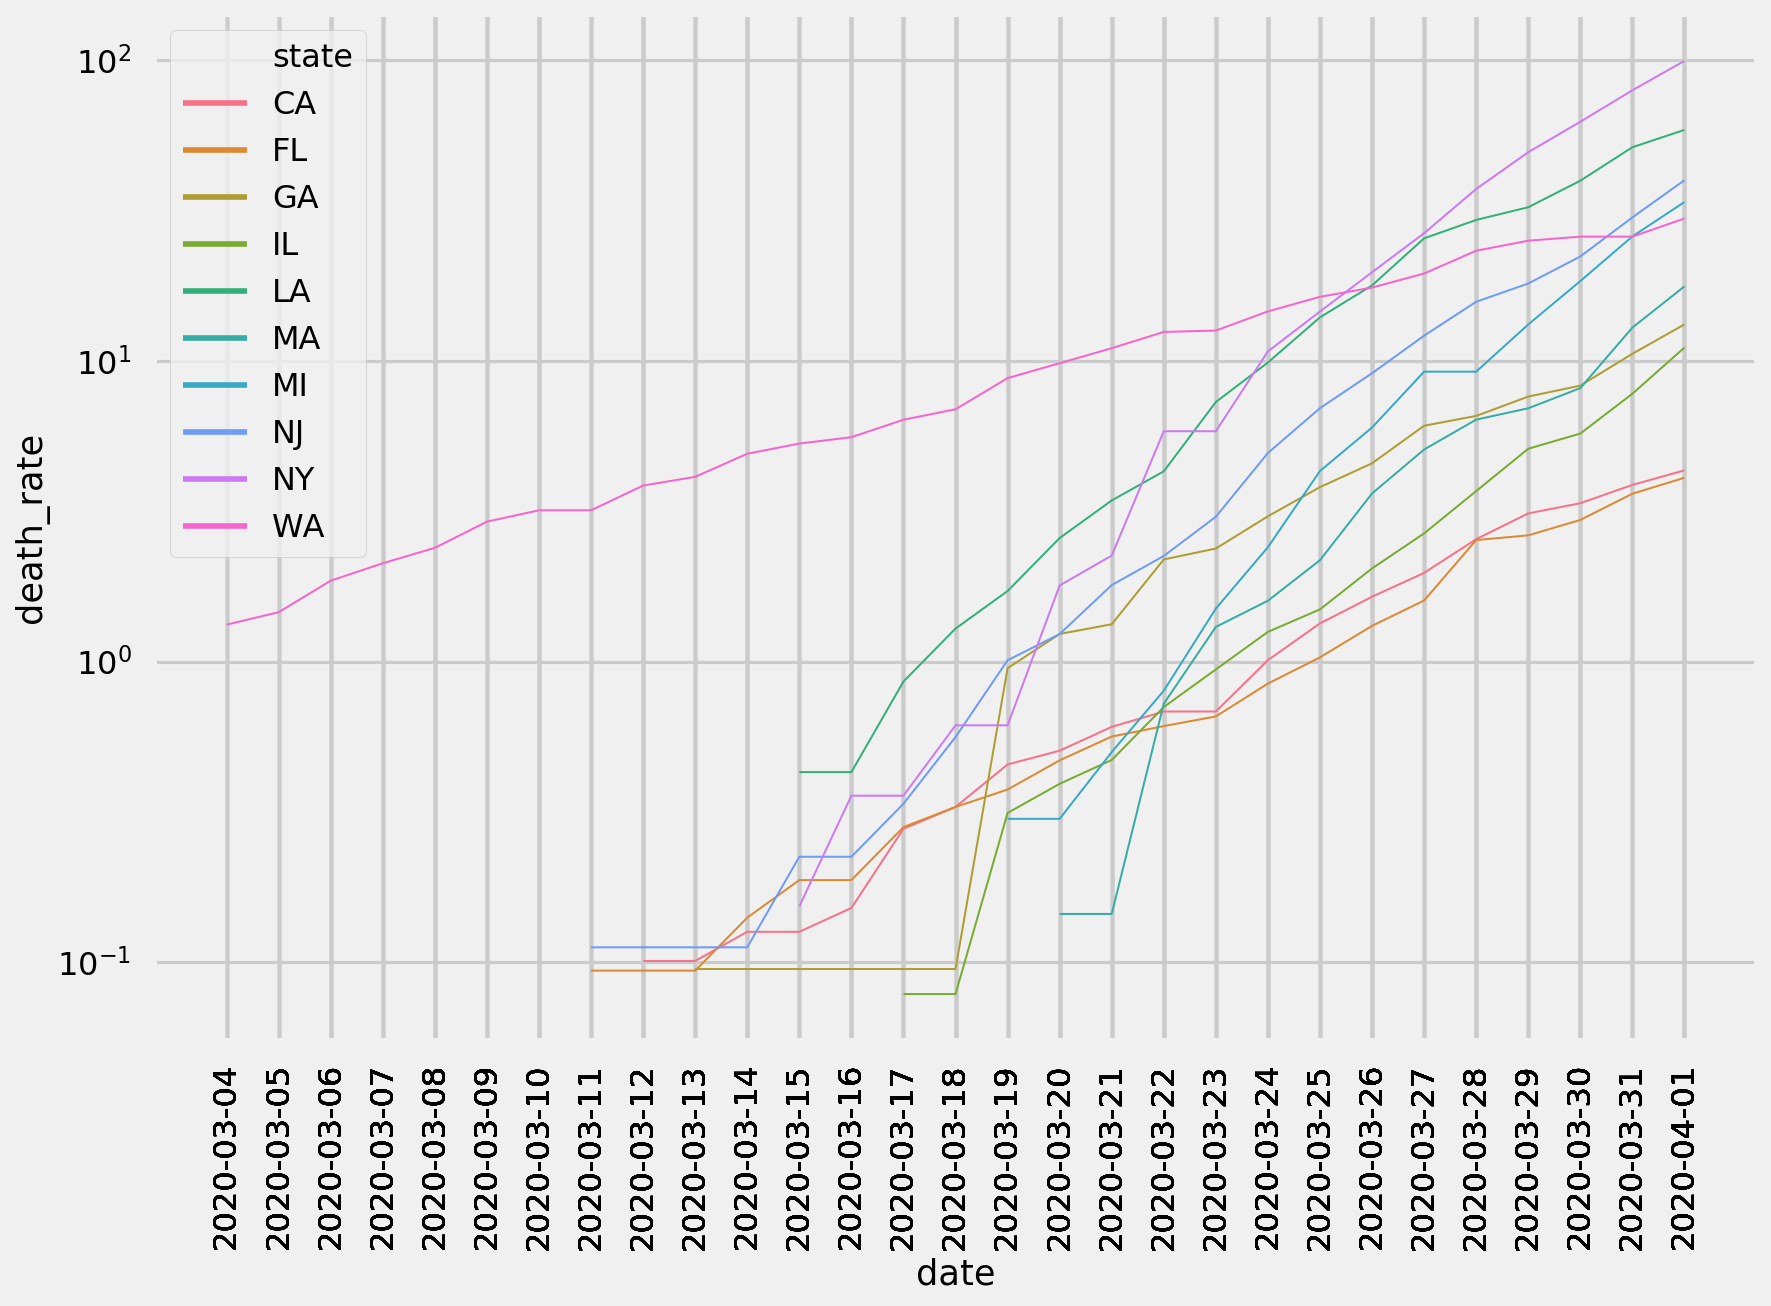

In [21]:
ax = sns.lineplot(x="date", y="death_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Tests Per Million People

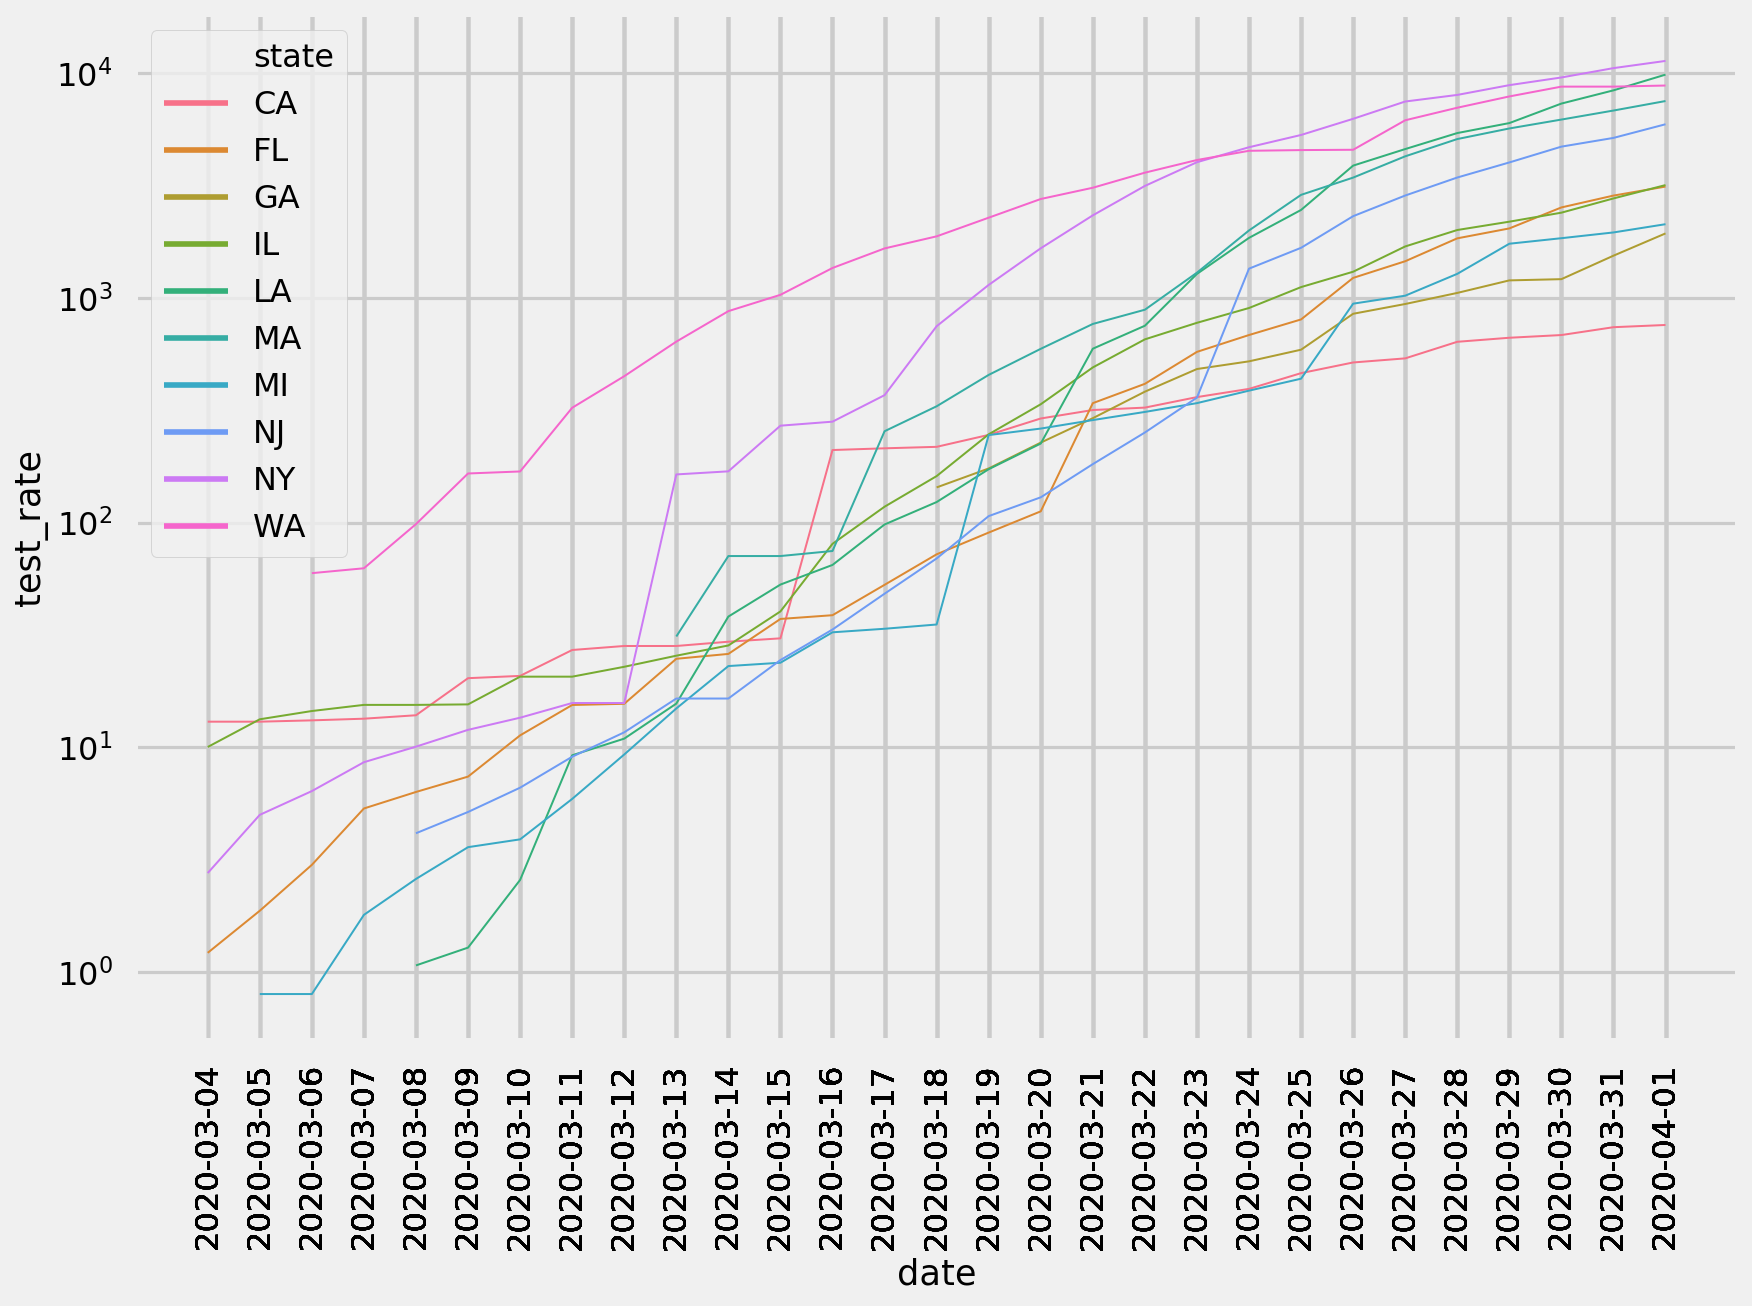

In [22]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [25]:
df_states.query('date == @latest_date').sort_values(by='test_rate', 
                                                    ascending=False)[['state', 'test_rate']]

,state,test_rate
931,NY,11302.714038
494,LA,9823.222341
1306,WA,8784.977847
520,MA,7495.926269
1279,VT,7177.083150
1225,UT,6696.076214
876,NM,6318.518222
305,HI,6285.854680
0,AK,6241.880673
765,ND,5911.243203
